In [195]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from spicy import optimize

In [139]:
fname = 'ASTR19_Data.txt'
#f = open(fname,'r')

In [354]:
def get_sin(x,A,f,px,py):
    return A*np.sin(f*x+px)+py
def get_cos(x,A,f,px,py):
    return A*np.cos(f*x+px)+py

In [380]:
gen_dat_arr = np.genfromtxt(fname,dtype='str')
#print(gen_dat_arr)

times = np.asarray([(float(i[1][-2:])+float(i[1][:-3])*60.)/1440.+float(i[0]) for i in gen_dat_arr])
tide = np.asarray([float(i[2]) for i in gen_dat_arr])

hightimes = np.asarray([times[i] for i in range(0,len(times),2)])
lowtimes = np.asarray([times[i] for i in range(1,len(times),2)])

hightide = np.asarray([tide[i] for i in range(0,len(tide),2)])
lowtide = np.asarray([tide[i] for i in range(1,len(tide),2)])

npoints = len(times)
sigma = np.std(tide)
y_err = np.full(npoints,sigma)

#print(type(times))
print((np.sum(y_err)/npoints)**.5)
print(sigma)

1.54293254105593
2.38064082624931


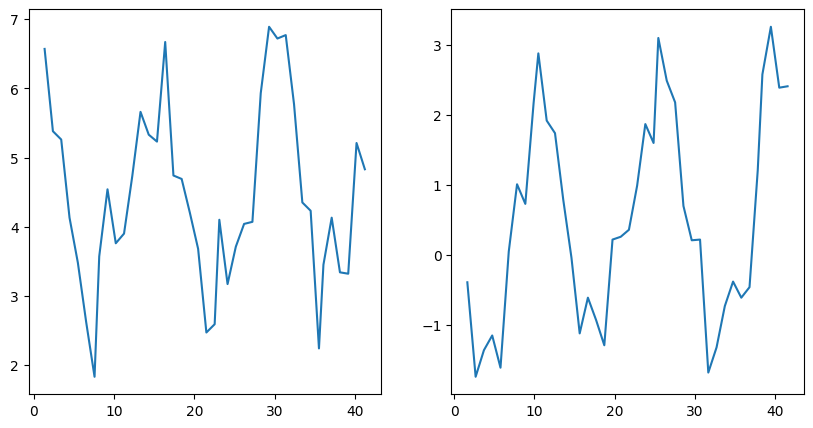

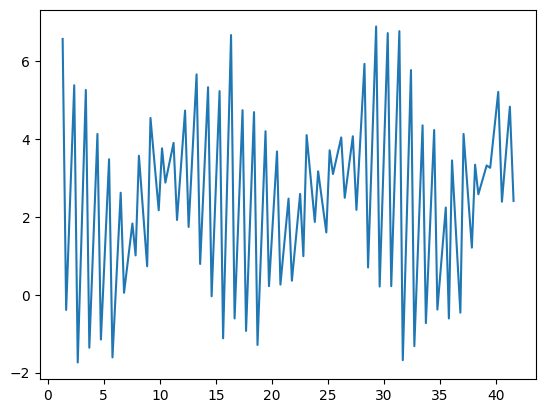

In [193]:
f,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(hightimes,hightide)
#ax[0].set_aspect(5)
ax[1].plot(lowtimes,lowtide)

plt.figure()
ltcurve = plt.plot(times,tide)

In [251]:
def get_mean(x0,x1):
    mean = []
    for i in range(41):
        mean.append((x0[i]+x1[i])/2.)
    return np.asarray(mean)

In [381]:
#Getting a mean tide of each day
meantide = get_mean(hightide,lowtide)
meantimes = get_mean(hightimes,lowtimes)
#print(meantide,meantimes)

#Parameters of the sin curve so we can fit a curve to the trend of the tide over 41 days
muA = (np.max(meantide)-np.min(meantide))/2.
muf = 2.75/41*2*np.pi
mupx = 1.4
mupy = np.mean(tide,dtype=np.float32)

print(muA,muf,mupx,mupy)
params,params_cov = optimize.curve_fit(get_cos,times,tide,sigma=y_err,p0=[muA,muf,mupx,mupy])

#this sinusoidal maps the trend of the tides over the course of the 41 days
#tide_trend_fit = get_cos(times,muA,muf,mupx,mupy)
tide_trend_fit = get_cos(times,params[0],params[1],params[2],params[3])

1.4924999999999997 0.4214331608474113 1.4 2.4782927


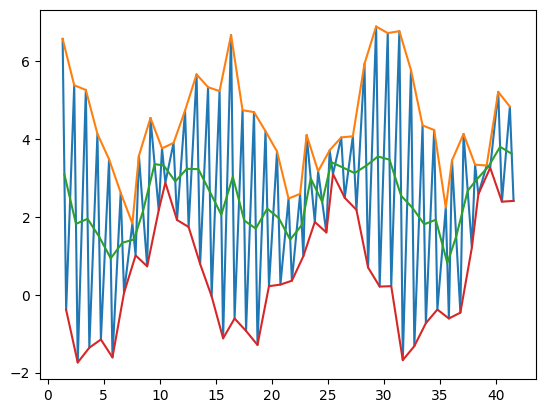

In [367]:
plt.plot(times,tide)
plt.plot(hightimes,hightide)
plt.plot(meantimes,meantide)
plt.plot(lowtimes,lowtide)

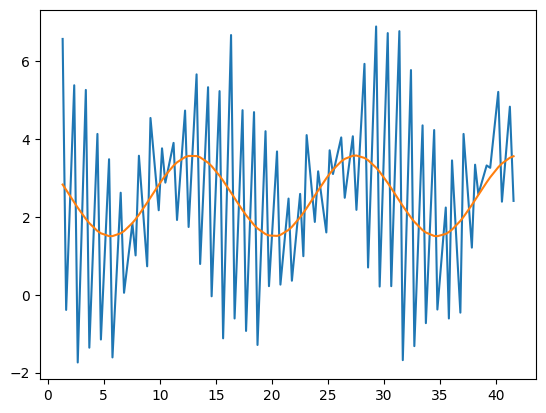

In [366]:
plt.plot(times,tide)
plt.plot(times,tide_trend_fit)

In [361]:
RMS_err = np.sqrt(np.abs(np.sum([tide_trend_fit[i]-tide[i] for i in range(len(tide))])/npoints))
print(RMS_err)

5.750907090211693e-05


In [376]:
A = (np.max(tide)-np.min(tide))/2.
f = npoints/41*2*np.pi
phix = np.pi/4
phiy = np.mean(tide,dtype=np.float32)

tide_fit = get_cos(times,A,f,phix,phiy)
print(A,f,phix,phiy)

4.3149999999999995 12.566370614359172 0.7853981633974483 2.4782927


(0.0, 20.0)

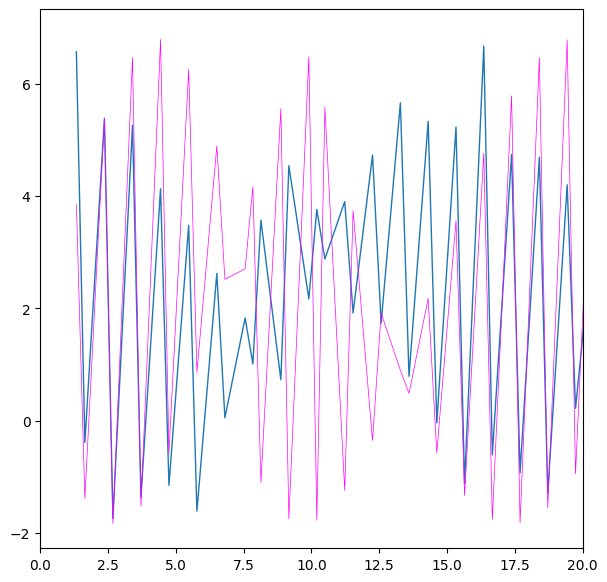

In [378]:
f = plt.figure(figsize=(7,7))
plt.plot(times,tide,linewidth=1)
fig = plt.plot(times,tide_fit,color='magenta',linewidth=0.5)
plt.xlim([0,20])